# CS985 and CS986 Assignment 1 : A regression problem

**Team's name: Group O**
*   Chavinpat Naimee (201976778) (CS985)
*   Chinnakrit Nitipornsri (201964692) (CS986)
*   Kittanon Na Nakhon (201964002) (CS986)
*   Nuallahong Silaung (201986533) (CS986)

<a id="obj"></a>
## 1. The Objective :
The main analysis of this project is to predict the popularity score of a song in the data coming from Spotify. (The data comes from Regression problem: https://www.kaggle.com/t/fcb56e49f46d4bfb999148579d857fbc) 

## 2. Meaning of Dataset :
This dataset consists of two datasets of the train and test dataset, which indicates the data of 453 rows 15 columns and 114 rows 14 columns respectively. However, the missing column of the test dataset is "popularity", which is the key finding of this project.


## 3. Overall analysis :

### 3.1 Data Exploding
- Import libraries and datasets
- Overview the information of both datasets
- Reflection on Data Exploding

### 3.2 Prepare the Data for Machine Learning Algorithms
- Data Cleaning
- Reflection on Prepare the Data

### 3.3 Discover and visualise the Data to Gain Insights
- Visualising Geographical Data
- Looking for Correlations
- Reflection on Discover and visualise the Data

### 3.4 Machine Learning Analysis Models
###### 3.4.1 Running Models
- Linear regression
- Regularised Linear model (Ridge Regression, Lasso Regression and Elastic Net)
- Random forests

##### 3.4.2 Imporving Models
- Polynomial Regression

##### 3.4.3 Reflection on Machine Learning Analysis

## 4. Conclusion

#### Required packages
- from google.colab import files
- import numpy as np
- import pandas as pd
- import seaborn as sns
- import matplotlib.pyplot as plt
- import warnings
- from sklearn.model_selection import train_test_split
- from sklearn.metrics import mean_squared_error, r2_score
- from sklearn.linear_model import LinearRegression
- from sklearn.linear_model import RidgeCV
- from sklearn.linear_model import Lasso
- from sklearn.linear_model import ElasticNet
- from sklearn.ensemble import RandomForestRegressor
- from sklearn.preprocessing import PolynomialFeatures
- from sklearn.preprocessing import normalize

# 3.1 Data Exploding

#### 3.1.1 Starting with import libraries and datasets

##### In term of running on Google colab

In [0]:
# from google.colab import files
# files.upload()

In [0]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

In [0]:
# !kaggle competitions download -c cs98x-spotify-regression

##### In term of running on Jupyter Notebook

In [0]:
import numpy as np   # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis

In [0]:
# Read training & test datasets by pandas package
train = pd.read_csv("CS98XRegressionTrain.csv")
test = pd.read_csv("CS98XRegressionTest.csv")

<a id="mac"></a>
#### 3.1.2 Providing an overview of information of both datasets

In [0]:
# To show 10 first order of train dataset
train.head(10)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
6,7,No Time,The Guess Who,album rock,1971,128,48,48,-14,5,12,219,8,6,44
7,8,End Of The Road,Boyz II Men,boy band,1991,150,43,64,-9,6,53,351,7,2,71
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
9,10,You Belong to My Heart,Timi Yuro,adult standards,2013,108,39,46,-10,16,50,126,82,3,35


In [0]:
# Print shape of train set
train.shape

(453, 15)

In [0]:
# To get Number of columns, Index, Datatype and Memory information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
Id           453 non-null int64
title        453 non-null object
artist       453 non-null object
top genre    438 non-null object
year         453 non-null int64
bpm          453 non-null int64
nrgy         453 non-null int64
dnce         453 non-null int64
dB           453 non-null int64
live         453 non-null int64
val          453 non-null int64
dur          453 non-null int64
acous        453 non-null int64
spch         453 non-null int64
pop          453 non-null int64
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [0]:
# To find and count 'NaN' in datasat
train.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [0]:
# To find and count values that equal to 0 in datasat
train[train == 0].count() 

Id            0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous        28
spch          0
pop           0
dtype: int64

In [0]:
train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [0]:
# To show 10 first order of test dataset
test.head(10)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
5,459,You Keep Me Hangin On,Kim Wilde,dance pop,1986,123,68,69,-12,14,71,255,8,3
6,460,Mandy,Barry Manilow,adult standards,1974,104,46,31,-9,14,32,213,42,3
7,461,Collette,Billy Fury,adult standards,1982,155,44,55,-10,10,73,112,82,4
8,462,Against All Odds (Take a Look at Me Now) - 201...,Phil Collins,mellow gold,2016,116,50,58,-7,13,11,206,20,3
9,463,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13


In [0]:
# Print shape of test set
test.shape

(114, 14)

In [0]:
# To get Number of columns, Index, Datatype and Memory information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
Id           114 non-null int64
title        114 non-null object
artist       114 non-null object
top genre    113 non-null object
year         114 non-null int64
bpm          114 non-null int64
nrgy         114 non-null int64
dnce         114 non-null int64
dB           114 non-null int64
live         114 non-null int64
val          114 non-null int64
dur          114 non-null int64
acous        114 non-null int64
spch         114 non-null int64
dtypes: int64(11), object(3)
memory usage: 12.5+ KB


In [0]:
# To find and count 'NaN' in datasat
test.isnull().sum()

Id           0
title        0
artist       0
top genre    1
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

In [0]:
# To find and count values that equal to 0 in datasat
test[test == 0].count() 

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        5
spch         0
dtype: int64

In [0]:
test.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,510.500000,1990.596491,122.342105,60.877193,58.921053,-8.964912,20.131579,58.368421,227.973684,31.078947,6.263158
std,33.052988,16.545844,26.322650,22.950173,15.022782,3.957584,16.786801,24.286368,63.482345,29.963738,6.594517
min,454.000000,1945.000000,64.000000,6.000000,26.000000,-22.000000,2.000000,11.000000,112.000000,0.000000,3.000000
25%,482.250000,1978.250000,106.000000,44.000000,50.250000,-11.750000,10.000000,36.750000,184.250000,5.250000,3.000000
50%,510.500000,1991.000000,120.000000,59.500000,57.500000,-8.000000,14.000000,61.500000,215.500000,19.500000,4.000000
75%,538.750000,2005.750000,136.750000,80.000000,69.000000,-6.000000,24.000000,79.750000,264.000000,50.250000,6.000000
max,567.000000,2019.000000,191.000000,98.000000,94.000000,-1.000000,90.000000,98.000000,444.000000,97.000000,47.000000


#### 3.1.3 Reflection on Data Exploding

The dataset structure provides rows and columns in the dataset, which represents one district provided 15 attributes including Id, title, artist, top genre, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, and pop. Moreover, there are 453 instances in the training set and 114 instances in a testing set, which seems to be a small amount of data. From the table, it can be seen that top_genre attribute has only 438 non-null values, meaning that 15 districts are missing this feature. From the table, it can be seen that top_genre attribute has only 438 non-null values, meaning that 15 districts are missing this feature. Find and count the amount of missing value in train dataset also find the values that equal to 0. Furthermore, use train.describe() to present a summary of the numerical attribute that shows the self-explanatory value such as count, mean, min, and max as well as the std row that show the standard deviation to illustrate a result of how dispersed the values are. The 25%, 50%, and 75% in the table represent the corresponding percentiles. Besides, follow the same step to the test dataset by choosing the first 10 rows to check the overall in test dataset before using test.info(). There are 114 instances in test dataset, and it can be seen that it has only one district missing this feature in top_genre. There are 5 districts from acous that has a value equal to 0. Lastly, show the summary table of a test dataset by test.describe to check the basic statistic for the numerical attribute. Therefore, managing with missing values is required for the next step.

# 3.2 Prepare the Data for Machine Learning Algorithms

#### 3.2.1 Data Cleaning

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Add values instead of 'NaN' in train datasat
train.ix[1, 'top genre'] = 'pop'
train.ix[8, 'top genre'] = 'pop'
train.ix[26, 'top genre'] = 'pop'
train.ix[72, 'top genre'] = 'blues'
train.ix[90, 'top genre'] = 'pop'
train.ix[98, 'top genre'] = 'pop'
train.ix[220, 'top genre'] = 'pop'
train.ix[252, 'top genre'] = 'rock-and-roll'
train.ix[265, 'top genre'] = 'rock-and-roll'
train.ix[266, 'top genre'] = 'pop'
train.ix[314, 'top genre'] = 'pop'
train.ix[330, 'top genre'] = 'dance pop'
train.ix[362, 'top genre'] = 'pop'
train.ix[380, 'top genre'] = 'r&b'
train.ix[443, 'top genre'] = 'pop'

In [0]:
# Check that they have no NaN valuse in dataset
train.isnull().sum()

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [0]:
# Add values instead of 'NaN' in test dataset
test.ix[66, 'top genre'] = 'pop'

In [0]:
# Check that they have no NaN valuse in dataset
test.isnull().sum()

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

#### 3.2.2 Reflection on Prepare the Data for Machine Learning Algorithms

To clean the dataset, which is not a large dataset. The project can add missing district values manually for both the train and test dataset. First, import warning library and then control the waring message by warning filter to be “ignore”. Afterwards, prepare the dataset by adding the missing district values for the train, and test dataset in top_genre due to the machine learning algorithms cannot work if there are any missing feature. Moreover, make sure that there is no any missing feature by using train.isnull().sum() to check the train and test dataset, and it can be seen that train dataset does not have any missing feature.

#  3.3 Discover and visualise the Data to Gain Insights

In [0]:
# Provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Python 2D plotting library and it's numerical mathematics extension NumPy
import matplotlib.pyplot as plt 

#### 3.3.1 Visualising Geographical Data

To check the distribution of the dataset from the visualisation, the most convenient step can be done by plotting univariate distributions in seaborn. The displot() functions will draw a histogram and fit a kernel density estimate.

Text(0.5, 1.0, 'Popularity Distribution')

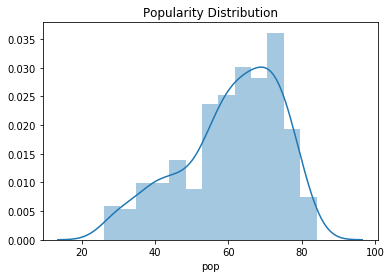

In [0]:
# Check nornal distribution
sns.distplot(train['pop']).set_title('Popularity Distribution')

#### 3.3.2 Looking for Correlations

The pair plot and heatmap is a 2-dimensional method of representing the data. The pair plotting illustrate a correlation two relationship between two attributes, which can indicate whether or not the pairs of variables are strongly related. Moreover, the heatmap provides data values that represented in the graph as colours. The heatmap aims to provide a vivid visual information description.

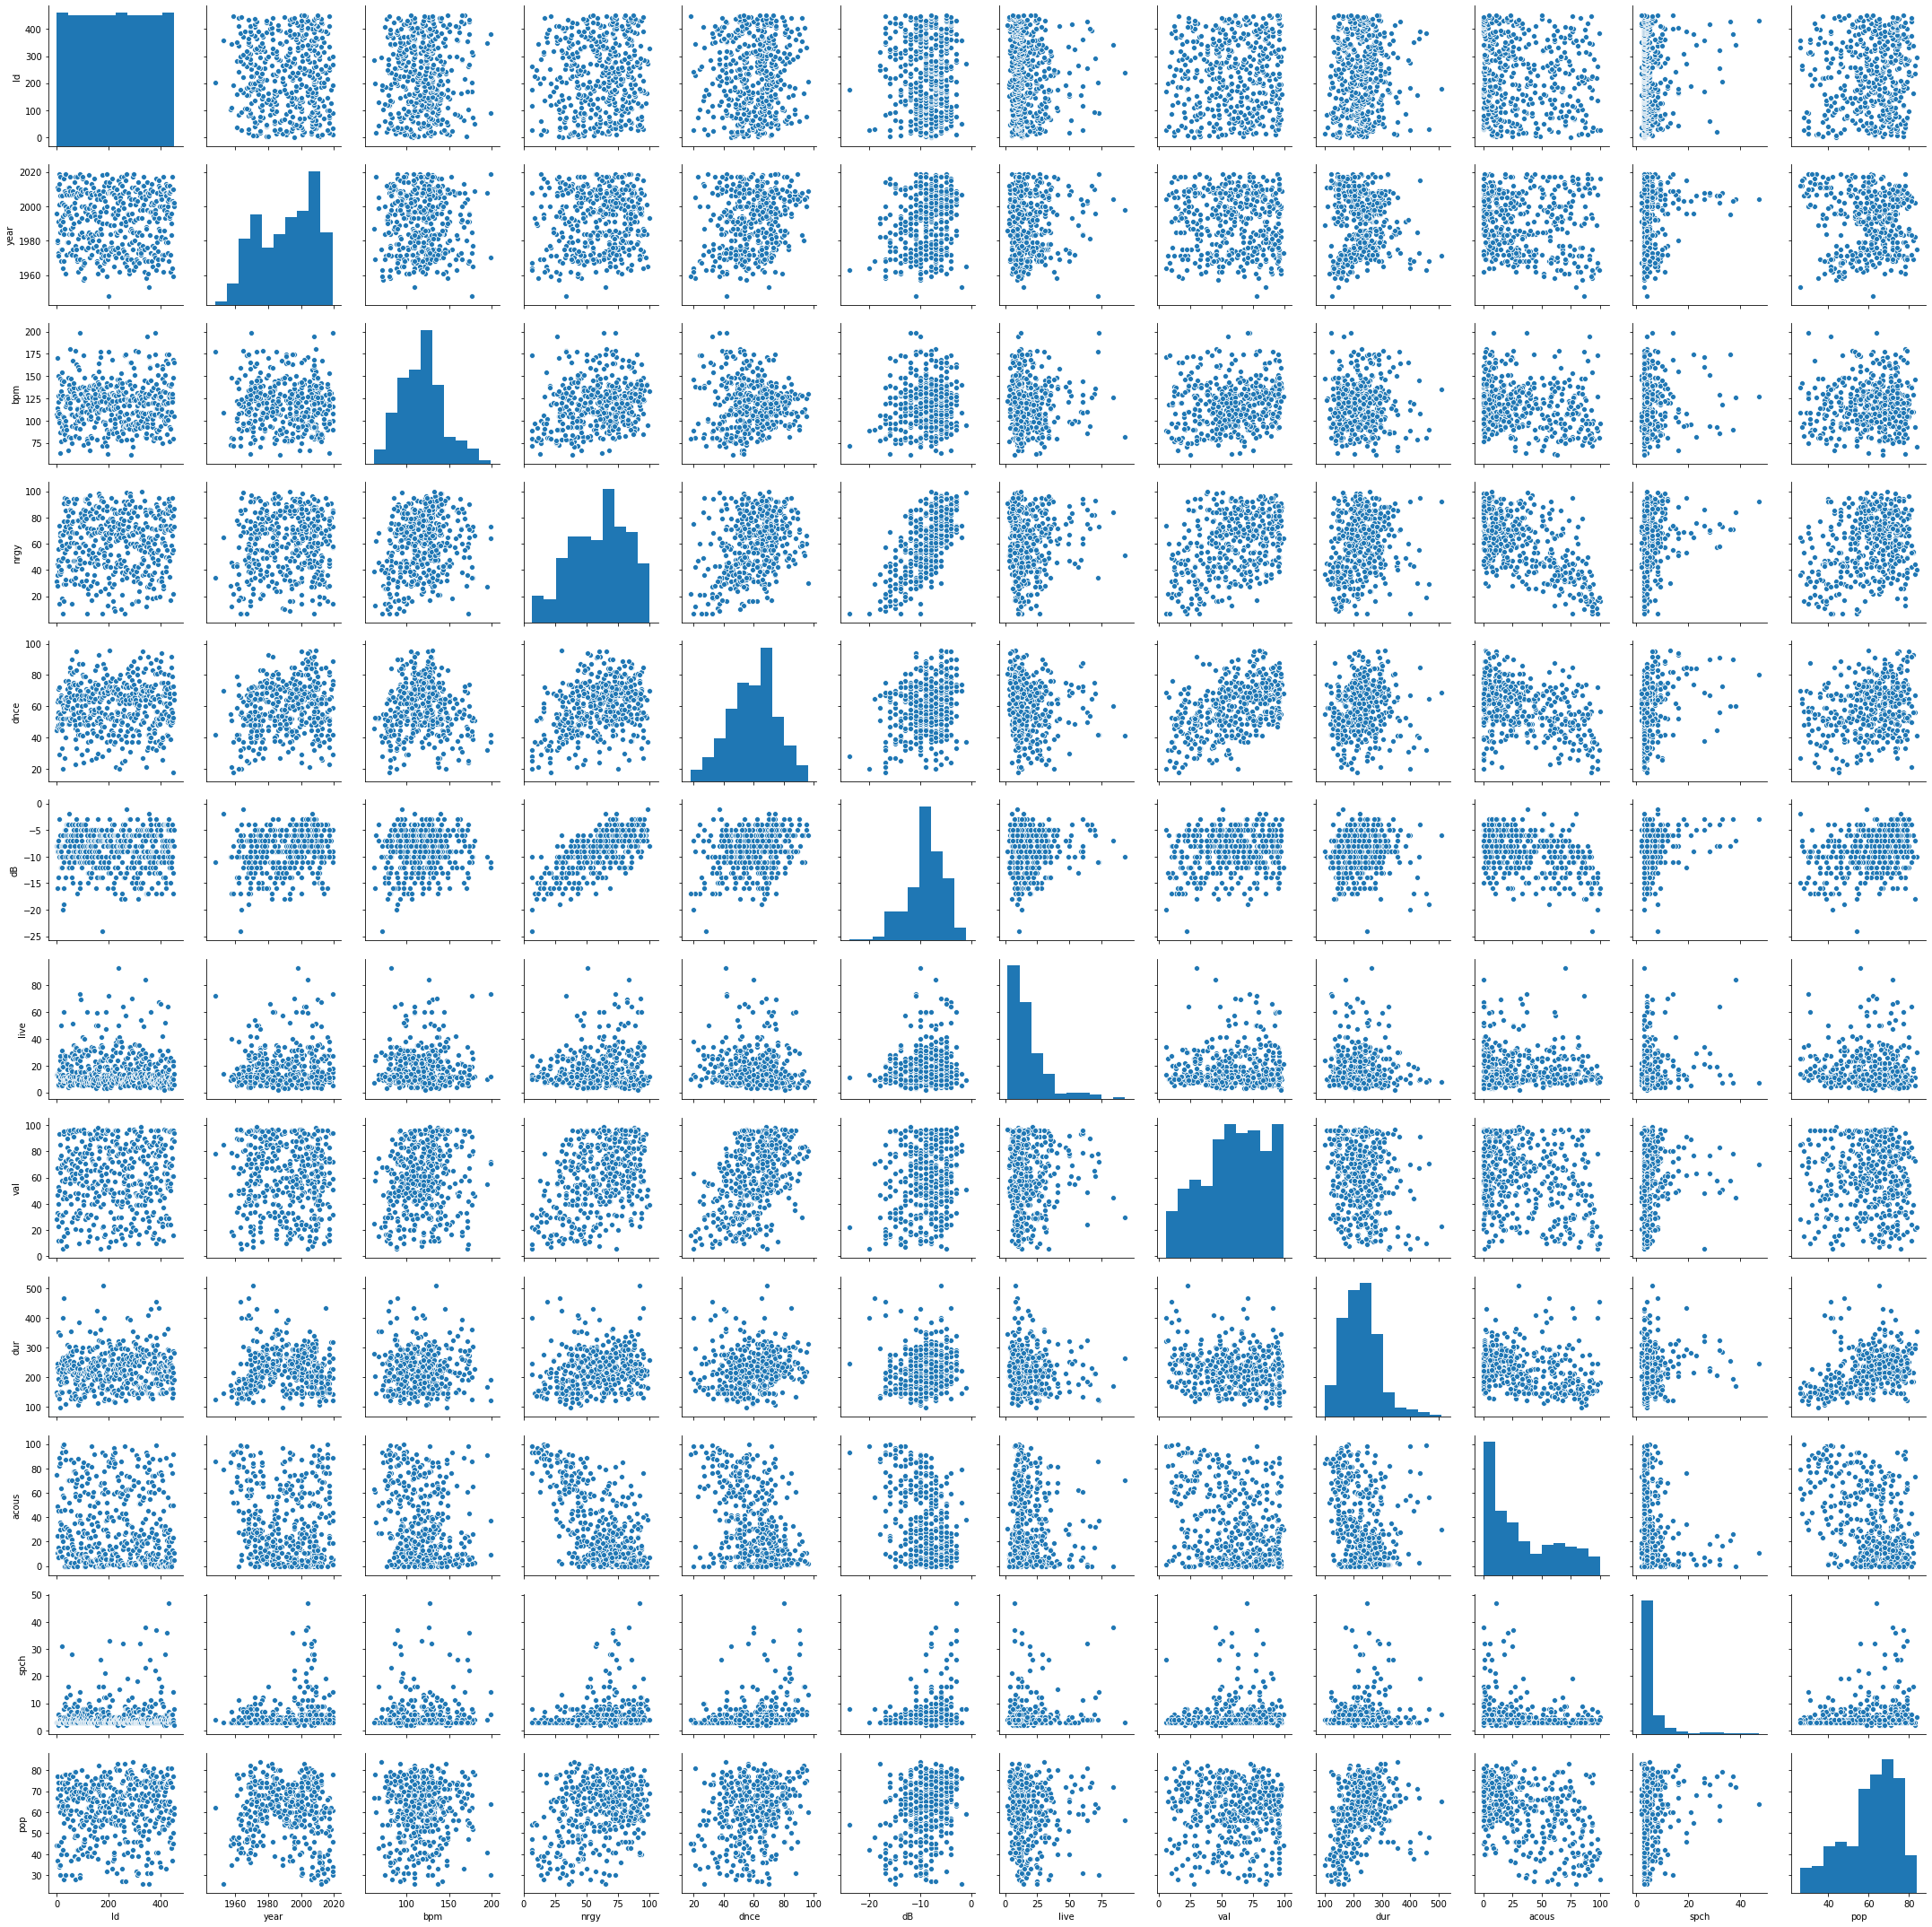

In [0]:
# plot scatter of dataset
sns.pairplot(train)

In [0]:
#Show correlation comparing with pop
corr = train.corr()
corr['pop'].sort_values(ascending=False)

pop      1.000000
dur      0.363266
dB       0.316854
nrgy     0.303797
dnce     0.258670
spch     0.130955
Id       0.086837
bpm      0.055024
val     -0.018713
live    -0.051364
year    -0.054293
acous   -0.465875
Name: pop, dtype: float64

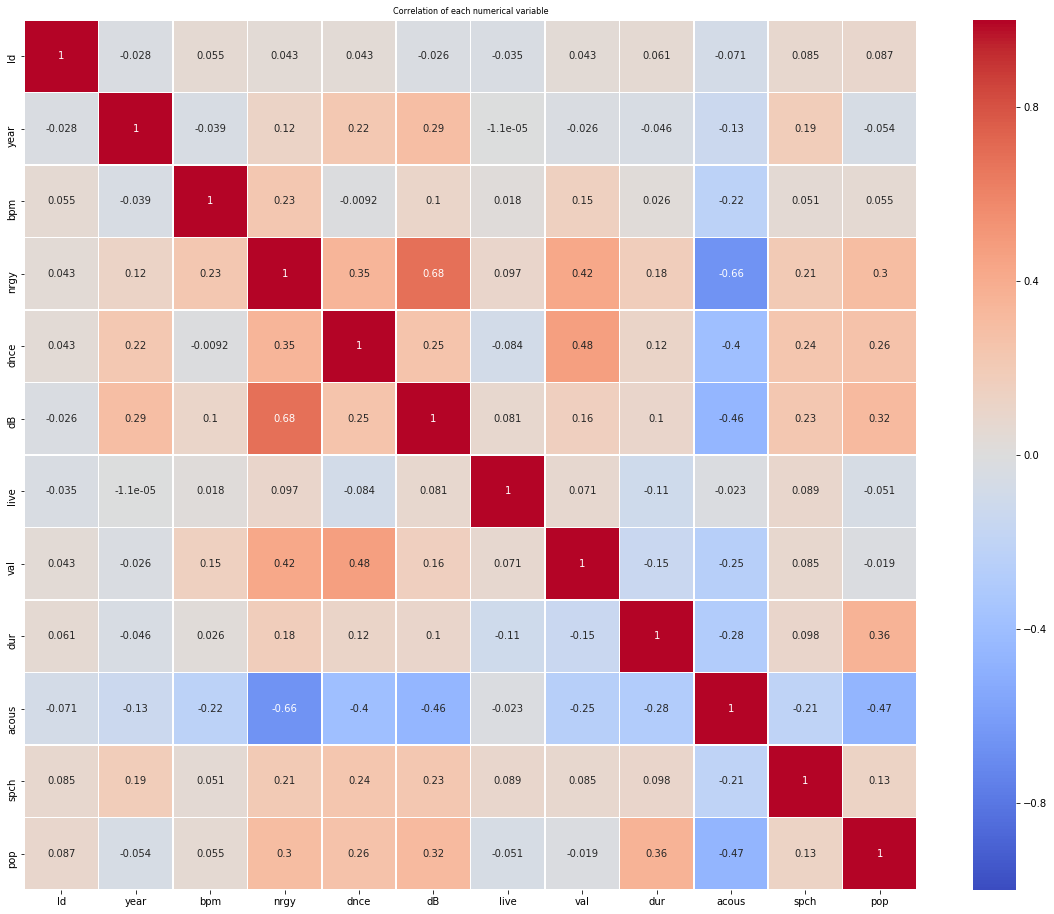

In [0]:
# Plot a heatmap showing the correlation between each numerical variable
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True, linewidths=.5, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation of each numerical variable', size = 8)
plt.show()

#### 3.3.3 Reflection on Discover and visualise the Data to Gain Insights

According to the normal distribution graph, it can be seen that dataset does not have a normal distribution, so it might have to normalise data for further analysis. The pair plot visualisation provides that the relationship between data have a high variance of the distribution. Therefore, the heatmap is required to find the correlation as a value, also the different shade of colour. The result shows that the highest positive correlation is dur the highest negative correlation is acous when compare to the popularity. Therefore, this project can eliminate the attribute of year, which is the worst correlation in the dataset.

# 3.4 Machine Learning Analysis Models

According to the obstruction of the testing dataset that has no target column of popularity, then the training dataset has to be used as both training and testing. However, the evaluation of a model skill only the training dataset would result in a biased score. To avoid prediction bias, the dataset has to split into three datasets that are training, validation and testing set.
- The training set is used for learning, that is to fit the parameters of the regression.
- The validation set is used to tune the parameters of the regression.
- The test set is used only to assess the performance of a fully-specified regression.

Feature Engineering is an important process that affects the efficiency of the model and feature selection is one of the feature engineering techniques. Correlation of numerical variables would be used to select features that related to the popularity score. 

The correlation matrix shows that several features should be used to train the model. They were comparing between each feature and target variable (popularity), Features with their correlation more than 0.1 were chosen to train the model. Therefore, features that will be used to train this model are energy(nrgy), danceability(dncb), loudness(dB), duration(dur), acousticness(acous), and speechiness(spch).


#### Spliting the train data and segment test data

In [0]:
from sklearn.model_selection import train_test_split

# Segment train output variables
X_num = train.loc[:,['nrgy','dnce','dB','dur','acous','spch']].values
# Segment train input variables
Y_num = train.loc[:,'pop'].values

# Segment the data in a training and test set with a 80/20 split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_num, Y_num, test_size=0.2, random_state=42)

# Segment test input variables
X_test = test.loc[:,['nrgy','dnce','dB','dur','acous','spch']].values

#### 3.4.1 Running Models

To get further insight into how this rate popularity, a regression analysis by using varies models was conducted to find the best matching between algorithms and dataset. There are five selected models of Linear Regression, Ridge Regression, Lasso Regression, Elastic Net and Random forest for predicting through the RMSE (Root Mean Squared Error) and R-squared.

The RMSE illustrates the absolute fit of the model to data and how close the observed data points are to the predicted values. Therefore, the RSME values can then measure how accurately the model predicts the response, which lower values of RMSE indicate better fit than higher. Whereas, the R-squared is a relative measure of fit that higher values of R-squared indicate better fit than lower. However, RMSE and R-squared may have to be considered that the data is Overfitting or Underfitting at the same time. Therefore, comparing both scores of training and validation, the dataset is required to consider to choose a model.



In [0]:
##### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a copy of data that does not affect to original trian and test set
Y_train_li = Y_train.copy()
X_train_li = X_train.copy()
X_test_li = X_test.copy()
Y_valid_li = Y_valid.copy()
X_valid_li = X_valid.copy()

# Call Linear regression
li_regres = LinearRegression()
# Training the Linear regression algorithm
li_regres.fit(X_train_li, Y_train_li) 

# Predict popularity of test set from the model
Y_pred_li = li_regres.predict(X_test_li)
Y_train_pred_li = li_regres.predict(X_train_li)  # predict popularity of training dataset from the model
Y_pred_valid_li = li_regres.predict(X_valid_li)  # predict popularity of validation dataset from the model

# Print out RMSE and R-square
li_rmse = np.sqrt(mean_squared_error(Y_train_li,Y_train_pred_li))
li_r2 = r2_score(Y_train_li,Y_train_pred_li)
print("Training dataset")
print("Linear Regression RMSE score is",li_rmse)
print("Linear Regression R-squared score is",li_r2)

# Print out RMSE and R-square validation
li_rmse_val = np.sqrt(mean_squared_error(Y_valid_li,Y_pred_valid_li))
li_r2_val = r2_score(Y_valid_li,Y_pred_valid_li)
print()
print("Validation dataset")
print("Linear Regression RMSE score is",li_rmse_val)
print("Linear Regression R-squared score is",li_r2_val)

Training dataset
Linear Regression RMSE score is 10.977005570516566
Linear Regression R-squared score is 0.28737043067815626

Validation dataset
Linear Regression RMSE score is 12.333998511699837
Linear Regression R-squared score is 0.3198810613469868


##### Ridge Regression

In [0]:
from sklearn.linear_model import RidgeCV

# Create a copy of data that does not affect to original trian and test set
Y_train_rid = Y_train.copy()
X_train_rid = X_train.copy()
X_test_rid = X_test.copy()
Y_valid_rid = Y_valid.copy()
X_valid_rid = X_valid.copy()

# Call Ridge regression
rid_regres = RidgeCV()
# Training the Ridge regression algorithm
rid_regres.fit(X_train_rid, Y_train_rid)

# Predict popularity of test set from the model
Y_pred_rid = rid_regres.predict(X_test_rid)
Y_train_pred_rid = rid_regres.predict(X_train_rid)
Y_pred_valid_rid = rid_regres.predict(X_valid_rid)

# Print out RMSE and R-square
rid_rmse = np.sqrt(mean_squared_error(Y_train_rid,Y_train_pred_rid))
rid_r2 = r2_score(Y_train_rid,Y_train_pred_rid)
print("Training dataset")
print("Ridge Regression RMSE score is",rid_rmse)
print("Ridge Regression R-squared score is",rid_r2)

# Print out RMSE and R-square validation
rid_rmse_val = np.sqrt(mean_squared_error(Y_valid_rid,Y_pred_valid_rid))
rid_r2_val = r2_score(Y_valid_rid,Y_pred_valid_rid)
print()
print("Validation dataset")
print("Ridge Regression RMSE score is",rid_rmse_val)
print("Ridge Regression R-squared score is",rid_r2_val)

Training dataset
Ridge Regression RMSE score is 10.977009794274517
Ridge Regression R-squared score is 0.28736988226349647

Validation dataset
Ridge Regression RMSE score is 12.332793471667499
Ridge Regression R-squared score is 0.3200139510195048


##### Lasso Regression

In [0]:
from sklearn.linear_model import Lasso

# Create a copy of data that does not affect to original trian and test set
Y_train_las = Y_train.copy()
X_train_las = X_train.copy()
X_test_las = X_test.copy()
Y_valid_las = Y_valid.copy()
X_valid_las = X_valid.copy()

# Call Lasso regression
las_regres =  Lasso(alpha=0.1)
# Training the Lasso regression algorithm
las_regres.fit(X_train_las, Y_train_las)

# Predict popularity of test set from the model
Y_pred_las = las_regres.predict(X_test_las)
Y_train_pred_las = las_regres.predict(X_train_las)
Y_pred_valid_las = las_regres.predict(X_valid_las)

# Print out RMSE and R-square
las_rmse = np.sqrt(mean_squared_error(Y_train_las,Y_train_pred_las))
las_r2 = r2_score(Y_train_las,Y_train_pred_las)
print("Training dataset")
print("Lasso Regression RMSE score is",las_rmse)
print("Lasso Regression R-squared score is",las_r2)

# Print out RMSE and R-square validation
las_rmse_val = np.sqrt(mean_squared_error(Y_valid_las,Y_pred_valid_las))
las_r2_val = r2_score(Y_valid_las,Y_pred_valid_las)
print()
print("Validation dataset")
print("Lasso Regression RMSE score is",las_rmse_val)
print("Lasso Regression R-squared score is",las_r2_val)

Training dataset
Lasso Regression RMSE score is 10.977121176336919
Lasso Regression R-squared score is 0.2873554202895289

Validation dataset
Lasso Regression RMSE score is 12.325601486101869
Lasso Regression R-squared score is 0.3208068004099055


##### Elastic Net

In [0]:
from sklearn.linear_model import ElasticNet

# Create a copy of data that does not affect to original trian and test set
Y_train_elas = Y_train.copy()
X_train_elas = X_train.copy()
X_test_elas = X_test.copy()
Y_valid_elas = Y_valid.copy()
X_valid_elas = X_valid.copy()

# Call Elastic Net
elas_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
# Training the Elastic Net algorithm
elas_net.fit(X_train_elas, Y_train_elas)

# Predict popularity of test set from the model
Y_pred_elas = elas_net.predict(X_test_elas)
Y_train_pred_elas = elas_net.predict(X_train_elas) 
Y_pred_valid_elas = rid_regres.predict(X_valid_elas)

# Print out RMSE and R-square
elas_rmse = np.sqrt(mean_squared_error(Y_train_elas,Y_train_pred_elas))
elas_r2 = r2_score(Y_train_elas,Y_train_pred_elas)
print("Training dataset")
print("Elastic Net RMSE score is",elas_rmse)
print("Elastic Net R-squared score is",elas_r2)

# Print out RMSE and R-square validation
elas_rmse_val = np.sqrt(mean_squared_error(Y_valid_elas,Y_pred_valid_elas))
elas_r2_val = r2_score(Y_valid_elas,Y_pred_valid_elas)
print()
print("Validation dataset")
print("Elastic Net RMSE score is",elas_rmse_val)
print("Elastic Net R-squared score is",elas_r2_val)

Training dataset
Elastic Net RMSE score is 10.97708409583887
Elastic Net R-squared score is 0.28736023487996487

Validation dataset
Elastic Net RMSE score is 12.332793471667499
Elastic Net R-squared score is 0.3200139510195048


##### Random forests

In [0]:
from sklearn.ensemble import RandomForestRegressor

# Create a copy of data that does not affect to original trian and test set
Y_train_forr = Y_train.copy()
X_train_forr = X_train.copy()
X_test_forr = X_test.copy()
Y_valid_forr = Y_valid.copy()
X_valid_forr = X_valid.copy()

forr_regres = RandomForestRegressor()
forr_regres.fit(X_train_forr, Y_train_forr)

# Predict popularity of test set from the model
Y_pred_forr = forr_regres.predict(X_test_forr)
Y_train_pred_forr = forr_regres.predict(X_train_forr) 
Y_pred_valid_forr = forr_regres.predict(X_valid_forr)

# Print out RMSE and R-square
forr_rmse = np.sqrt(mean_squared_error(Y_train_forr,Y_train_pred_forr))
forr_r2 = r2_score(Y_train_forr,Y_train_pred_forr)
print("Training dataset")
print("Random Forest RMSE score is",forr_rmse)
print("Random Forest R-squared score is",forr_r2)

# Print out RMSE and R-square validation
forr_rmse_val = np.sqrt(mean_squared_error(Y_valid_forr,Y_pred_valid_forr))
forr_r2_val = r2_score(Y_valid_forr,Y_pred_valid_forr)
print()
print("Validation dataset")
print("Random Forest RMSE score is",forr_rmse_val)
print("Random Forest R-squared score is",forr_r2_val)

Training dataset
Random Forest RMSE score is 4.933180588447178
Random Forest R-squared score is 0.8560704069896644

Validation dataset
Random Forest RMSE score is 12.175073617125179
Random Forest R-squared score is 0.33729495496351525


#### 3.4.2 Improving Models

For improving the model, the algorithm is called Polynomial Regression. This algorithm could be used to fit a non-linear regression with a linear model by using a pipeline to add non-linear features, which might give a better score and accuracy in further prediction.

However, this algorithm has to work side by side with other algorithms. Therefore, this project will choose the model that has the best rating tendency of RMSE and R-squared score from the running model to use together with the improving models, which is the Random forests model.

In addition, one problem with this representation is that Machine Learning algorithms concluded that two neighbouring values are much more identical than two distant values. To solve this, the input of this transformer must be an array of entities or strings that denotes the values assumed by categorical (discrete) features. The functions are encoded using a single-hot encoding scheme (known as 'one-of-K' or 'dummy'), which generates a binary column for each group and gives a sparse matrix or dense array. Thus, this OneHotEncoder might give a better report for this project.

##### Polynomial Regression

In [0]:
# Import polynomial regression tool
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

# Create a copy of data that does not affect to original trian and test set
Y_train_norm_poly = Y_train.copy()
X_train_norm_poly = normalize(X_train)
X_test_norm_poly = normalize(X_test)
Y_valid_norm_poly = Y_valid.copy()
X_valid_norm_poly = normalize(X_valid)

# Create variables for collecting
rmse_norm = []
r2_norm = []
rmse_norm_valid = []
r2_norm_valid = []
degrees_norm = np.arange(1, 5)
min_norm_rmse, min_norm_r2, min_norm_deg = 1e10, -1, 0
min_norm_rmse_valid, min_norm_r2_valid = 1e10, -1

for deg in degrees_norm:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    
    # Fit transform
    X_train_tran_poly = poly_features.fit_transform(X_train_norm_poly)
    X_valid_tran_poly = poly_features.fit_transform(X_valid_norm_poly)
    X_test_tran_poly = poly_features.fit_transform(X_test_norm_poly)

    # Random forest
    poly_regres_norm = RandomForestRegressor()
    poly_regres_norm.fit(X_train_tran_poly, Y_train_norm_poly)
    
    # Predict test data
    Y_valid_pred_norm_poly = poly_regres_norm.predict(X_valid_tran_poly)
    Y_train_pred_norm_poly = poly_regres_norm.predict(X_train_tran_poly)
    Y_test_pred_norm_poly = poly_regres_norm.predict(X_test_tran_poly)
    
    # Calculating RSME & R2
    poly_mse_norm = mean_squared_error(Y_train_norm_poly,Y_train_pred_norm_poly)
    poly_rmse_norm = np.sqrt(poly_mse_norm)
    poly_r2_norm = r2_score(Y_train_norm_poly,Y_train_pred_norm_poly)
    rmse_norm.append(poly_rmse_norm)
    r2_norm.append(poly_r2_norm)
 
    # Calculating RSME & R2 Validation
    poly_mse_norm_valid = mean_squared_error(Y_valid_norm_poly,Y_valid_pred_norm_poly)
    poly_rmse_norm_valid = np.sqrt(poly_mse_norm_valid)
    poly_r2_norm_valid = r2_score(Y_valid_norm_poly,Y_valid_pred_norm_poly)
    rmse_norm_valid.append(poly_rmse_norm_valid)
    r2_norm_valid.append(poly_r2_norm_valid)   
    
    # Cross-validation of degree
    if  min_norm_rmse_valid > poly_rmse_norm_valid:
        min_norm_rmse = poly_rmse_norm
        min_norm_r2 =  poly_r2_norm
        min_norm_deg = deg
        min_norm_rmse_valid = poly_rmse_norm_valid
        min_norm_r2_valid =  poly_r2_norm_valid
        
# Print and plot results
print("Training dataset")
print("Best degree {} with RMSE score {} and R-square score {}".format(min_norm_deg, min_norm_rmse, min_norm_r2))
print()
print("Validation dataset")
print("Best degree {} with RMSE score {} and R-square score {}".format(min_norm_deg, min_norm_rmse_valid, min_norm_r2_valid))

Training dataset
Best degree 1 with RMSE score 5.051502702959888 and R-square score 0.8490833178231711

Validation dataset
Best degree 1 with RMSE score 11.909710693010506 and R-square score 0.3658682345395611


##### Apply OneHot Encoder of 'title' feature to Polynomial Regression

In this section, the 'artist' feature will be applied when training the model. Before using the text feature, encoder need to be change a text variable to be a numerical class using one hot encoder. The artist will be considered to use because popularity of any artist might effect to the popularity of a song.

In [0]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

train_artist = train[["artist"]]
train_artist = train_artist.values
test_artist = test[["artist"]]
test_artist = test_artist.values

data_artist = np.concatenate((train_artist,test_artist),axis=0)
# creating one hot encoder object by default 
# data passed is one hot encoded 

one_encoder = OneHotEncoder()
artist_1hot = one_encoder.fit_transform(data_artist)
artist_1hot = artist_1hot.toarray()

train_artist_1hot = artist_1hot[0:train.shape[0],:]
test_artist_1hot = artist_1hot[train.shape[0]:,:]

In [0]:
# Re-assign values of training and testing set for confirm that there are original data
X_num = train.loc[:,['nrgy','dnce','dB','dur','acous','spch']].values
Y_num = train.loc[:,'pop'].values
X_test = test.loc[:,['nrgy','dnce','dB','dur','acous','spch']].values

In [0]:
# Normalise of number data that does not affect to original trian and test set
X_num = normalize(X_num)
Y_num = Y_num.copy()
X_test = normalize(X_test)

In [0]:
# Combine original data with OneHot data
X = np.concatenate((X_num,train_artist_1hot),axis=1)
Y = Y_num.copy()
X_test = np.concatenate((X_test,test_artist_1hot),axis=1)

# Spliting it agaim
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
# Import polynomial regression tool, random forest model and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, r2_score

# Create a copy of data that does not affect to original trian and test set
Y_train_norm_poly = Y_train.copy()
X_train_norm_poly = X_train.copy()
X_test_norm_poly = X_test.copy()
Y_valid_norm_poly = Y_valid.copy()
X_valid_norm_poly = X_valid.copy()

# Train features
poly_features = PolynomialFeatures(degree=1, include_bias=False)
    
# Fit transform
X_train_tran_poly = poly_features.fit_transform(X_train_norm_poly)
X_test_tran_poly = poly_features.fit_transform(X_test_norm_poly)
X_valid_tran_poly = poly_features.fit_transform(X_valid_norm_poly)

# Random forest
poly_regres_norm = RandomForestRegressor()
poly_regres_norm.fit(X_train_tran_poly, Y_train_norm_poly)
    
# Predict test data
Y_train_pred_norm_poly = poly_regres_norm.predict(X_train_tran_poly)
Y_test_pred_norm_poly = poly_regres_norm.predict(X_test_tran_poly)
Y_valid_pred_norm_poly = poly_regres_norm.predict(X_valid_tran_poly)
    
# Calculating RSME & R2
poly_mse_norm = mean_squared_error(Y_train_norm_poly,Y_train_pred_norm_poly)
poly_rmse_norm = np.sqrt(poly_mse_norm)
poly_r2_norm = r2_score(Y_train_norm_poly,Y_train_pred_norm_poly)
        
print("Training dataset")
print("Random Forest RMSE score is",poly_rmse_norm)
print("Random Forest R-squared score is",poly_r2_norm)

# Print out RMSE and R-square validation
poly_rmse_val = np.sqrt(mean_squared_error(Y_valid_norm_poly,Y_valid_pred_norm_poly))
poly_r2_val = r2_score(Y_valid_norm_poly,Y_valid_pred_norm_poly)
print()
print("Validation dataset")
print("Random Forest RMSE score is",poly_rmse_val)
print("Random Forest R-squared score is",poly_r2_val)

Training dataset
Random Forest RMSE score is 4.866275306547712
Random Forest R-squared score is 0.8599479661889898

Validation dataset
Random Forest RMSE score is 11.817773911349812
Random Forest R-squared score is 0.3756207822160412


##### 3.4.3 Reflection on Machine Learning Analysis Models

In term of prediction of the running model, the result of using the validation dataset provides that the Random forests model gives a slightly highest scores in both RMSE score of 12.17507 and R-squared score of 0.33729 comparing to every model. Moreover, also the result of using the training dataset indicates much better in both RMSE score of 4.93318 and R-squared score of 0.85607 comparing to every model. However, a score of both datasets provides a clearly different, which means the Random forests model still have a bias on the prediction.
About the improving model, the Polynomial Regression with Random forests is used, which calculate the result of the best degree of 1 degree with RMSE score 11.90971 and R-square score 0.36586. Besides, using the same degree as Polynomial into OneHot Encoder gives the result as RMSE score 11.81777 and R-square score 0.37562.

# 4. Conclusions

In conclusion, the popularity prediction of a song has been concluded by separating into two main analysis methods. The first analysis is running though the simple model. The results from comparing the RMSE and R-squared score from Linear Regression, Ridge Regression, Lasso Regression, Elastic Net and Random forest model represent the best score for this project is on Random forest model. Whereas, this model still has a over-fitting on the prediction refer to the widely different score of training and validation set. Thus, the second analysis is required to improve the model by using OneHot Encoder before running the Polynomial Regression with Random forests. 

As a result, this improving model illustrates the best degree of 1 degrees with RMSE score 11.81777 and R-square score 0.37562. Additionally, the prediction in leaderboard competition shows a RMSE score of up to 6.39165, which is the best model for this project. However, This model still suffers from over-fitting. 

Note that the leaderboard is calculated with approximately 30% of the test data and the final results will be based on the other 70%, so the final result in Kaggle leaderboard might be diferent. 

Although this methodology might be the best solution for this dataset, it might not be the best solution for other prediction. Thus, for the recommendation, it should be better to get more data and use another tuning method into each attribute that might give a better accuracy rate and less bias for further analysis. These could also solve the over-fitting problem.


# 5. Result Submission to Kaggle Competition

Using the whole train set to train the model in order to let the model provides the best accuracy, due to the fact that more data should provide better efficiency.

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chavinpat","key":"2899879ef8e6ef142a8508858a7f3893"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c cs98x-spotify-regression

  0% 0.00/38.2k [00:00<?, ?B/s]
100% 38.2k/38.2k [00:00<00:00, 33.3MB/s]
  0% 0.00/9.58k [00:00<?, ?B/s]
100% 9.58k/9.58k [00:00<00:00, 9.41MB/s]


In [0]:
# Import libraries 
import numpy as np    # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis

# load training & test datasets
train = pd.read_csv("CS98XRegressionTrain.csv")
test = pd.read_csv("CS98XRegressionTest.csv")

In [0]:
# Segment train output variables
X_train = train.loc[:,['nrgy','dnce','dB','dur','acous','spch']].values
# Segment train input variables
Y_train = train.loc[:,'pop'].values
# Segment test input variables
X_test = test.loc[:,['nrgy','dnce','dB','dur','acous','spch']].values

In [0]:
# normalise numerical data of train and test set
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)

In [0]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

train_artist = train[["artist"]]
train_artist = train_artist.values
test_artist = test[["artist"]]
test_artist = test_artist.values

data_artist = np.concatenate((train_artist,test_artist),axis=0)
# creating one hot encoder object by default 
# data passed is one hot encoded 

one_encoder = OneHotEncoder()
artist_1hot = one_encoder.fit_transform(data_artist)
artist_1hot = artist_1hot.toarray()

train_artist_1hot = artist_1hot[0:train.shape[0],:]
test_artist_1hot = artist_1hot[train.shape[0]:,:]

In [0]:
# connect between the numerical data and the text data (encoded data)
X_train = np.concatenate((X_train,train_artist_1hot),axis=1)
X_test = np.concatenate((X_test,test_artist_1hot),axis=1)

In [0]:
# Import polynomial regression tool, random forest model and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Create a copy of data that does not affect to original trian and test set
Y_train_norm_poly = Y_train.copy()
X_train_norm_poly = X_train
X_test_norm_poly = X_test

# Train features
poly_features = PolynomialFeatures(degree=1, include_bias=False)
    
# Fit transform
X_train_tran_poly = poly_features.fit_transform(X_train_norm_poly)
X_test_tran_poly = poly_features.fit_transform(X_test_norm_poly)

# Random forest
poly_regres_norm = RandomForestRegressor()
poly_regres_norm.fit(X_train_tran_poly, Y_train_norm_poly)
    
# Predict test data
Y_train_pred_norm_poly = poly_regres_norm.predict(X_train_tran_poly)
Y_test_pred_norm_poly = poly_regres_norm.predict(X_test_tran_poly)
    
# Calculating RSME & R2
poly_mse_norm = mean_squared_error(Y_train_norm_poly,Y_train_pred_norm_poly)
poly_rmse_norm = np.sqrt(poly_mse_norm)
poly_r2_norm = r2_score(Y_train_norm_poly,Y_train_pred_norm_poly)
        
print("Training dataset")
print("Random Forest RMSE score is",poly_rmse_norm)
print("Random Forest R-squared score is",poly_r2_norm)

Training dataset
Random Forest RMSE score is 4.219429279382297
Random Forest R-squared score is 0.9016608031665957


# Submission Area

In [0]:
test["pop"] = Y_test_pred_norm_poly

test1_submission = test[["Id","pop"]]
test1_submission.to_csv("submission.csv", index=False)

In [0]:
!kaggle competitions submit -c cs98x-spotify-regression -f submission.csv -m "Message"

100% 1.11k/1.11k [00:00<00:00, 4.29kB/s]
Successfully submitted to CS985/6 Spotify Regression Problem